# Математика для Data Science.
# Домашнее задание №1.

Загрузим датасет о ценах на дома в Бостоне. 

In [14]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

import cv2
import urllib.request
from urllib.request import urlopen

import requests
import io

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [20]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [4]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [5]:
result = np.dot(x1, x2)
result

234704.86490859918

этап 2: взять два атрибута и посчитать скалярное произведение двух векторов (2 дома), начертить 2 дома как вектора в двухмерном пространстве, и сравниваем графически и через скалярное произведение.


In [115]:
v1 = np.array([boston.data[253][4], boston.data[253][9]])
v2 = np.array([boston.data[309][4], boston.data[309][9]])

In [116]:
result_1 = np.dot(v1, v2)
result_1

100320.234464

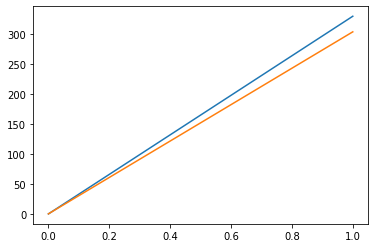

In [117]:
plt.plot(v1)
plt.plot(v2)

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

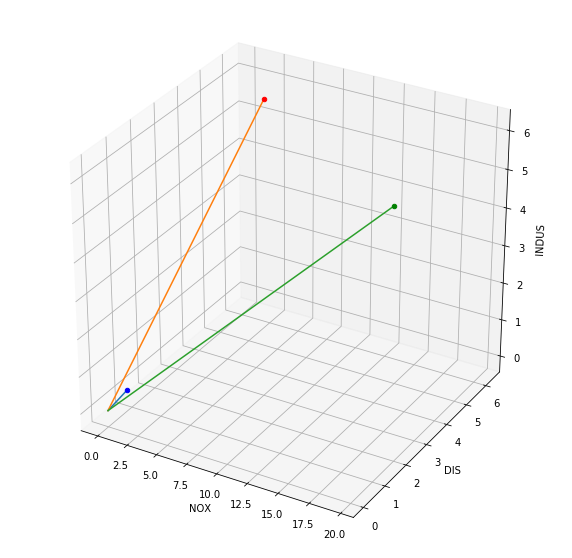

In [125]:
import matplotlib as mpl

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array([boston.data[150][4], boston.data[150][7], boston.data[150][2]])
y = np.array([boston.data[202][4], boston.data[202][7], boston.data[202][2]])
z = np.array([boston.data[303][4], boston.data[303][7], boston.data[303][2]])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('NOX')
ax.set_ylabel('DIS')
ax.set_zlabel('INDUS')

plt.show()

Найти косинус угла между векторами x1 и x2, где x1 и x2 - это два дома из 2ух атрибутов, полученных на этапе 2.

In [126]:
def cosine( a, b ):
    
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [127]:
cosine(v1,v2)

0.9999998831564645

Найти расстояние между точками x1 и x2.

In [132]:
#длины векторов?
print('длина вектора 1 равна ', round(np.linalg.norm(v1),1), ' длина вектора 2 равна ', round(np.linalg.norm(v2),1))

длина вектора 1 равна  330.0  длина вектора 2 равна  304.0


In [135]:
#или угол между векторами?
cos = cosine(v1, v2)
np.arccos(cos) * 360 / 2 / np.pi

0.027697462259629185

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

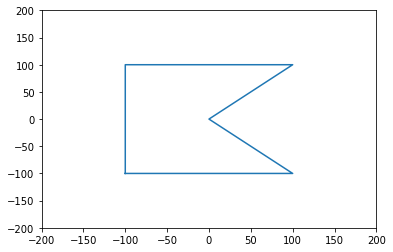

In [37]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [39]:
B = np.array(A) + [300,-200, 1]
print(B)

[[ 200 -300    2]
 [ 200 -100    2]
 [ 400 -100    2]
 [ 300 -200    2]
 [ 400 -300    2]
 [ 200 -300    2]]


(100, 500)

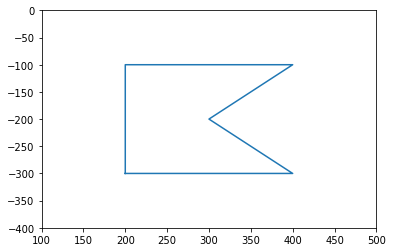

In [44]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-400, 0])
plt.xlim([100, 500])

Уменьшить объект в два раза.

In [45]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

In [46]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[-50 -50   1]
 [-50  50   1]
 [ 50  50   1]
 [  0   0   1]
 [ 50 -50   1]
 [-50 -50   1]]


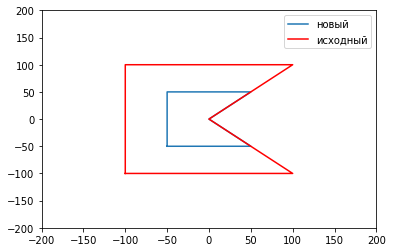

In [47]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Повернуть на 130 градусов.

In [93]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [94]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


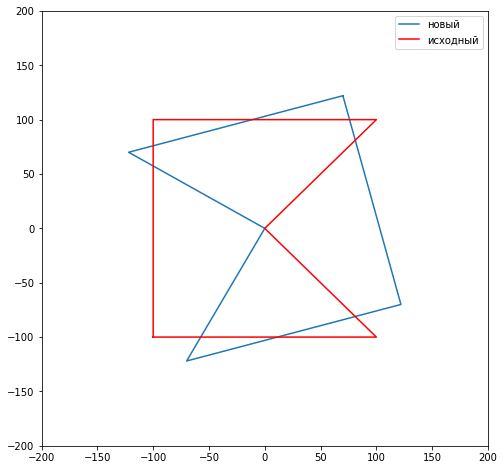

In [95]:
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Отразить объект относительно прямой y=x

In [136]:
TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

In [137]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[-100 -100    1]
 [ 100 -100    1]
 [ 100  100    1]
 [   0    0    1]
 [-100  100    1]
 [-100 -100    1]]


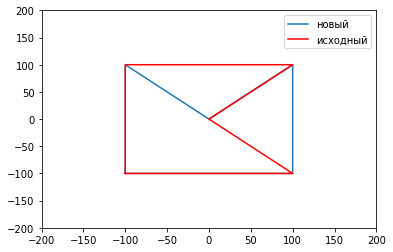

In [138]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [73]:
B = np.array(A) + [200,300, 1]
print(B)

[[100 200   2]
 [100 400   2]
 [300 400   2]
 [200 300   2]
 [300 200   2]
 [100 200   2]]


(0, 500)

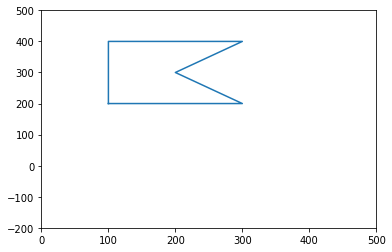

In [77]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([0, 500])

In [78]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1]
])

In [79]:
C = []
for point in B:
    new_point=np.dot(TransformArray,np.transpose(point))
    C.append(new_point)
C = np.array(C).astype(int)
print(C)

[[ 50 240   2]
 [ 50 480   2]
 [150 480   2]
 [100 360   2]
 [150 240   2]
 [ 50 240   2]]


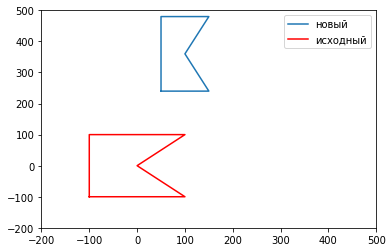

In [82]:
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 500])
plt.xlim([-200, 500])
plt.legend(['новый', 'исходный'])